In [1]:
import h5py
import numpy as np
from PIL import Image
import matplotlib.pylab as plt 
import umap
import matplotlib.image as mpimg
from sklearn.decomposition import PCA

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Notebnook to invesitgate the created embeddings and how information has been destroyed or preserved

In [2]:
def one_slide_umap(slide,axes,first=False):
    """Plot the umap of embeddings of the saame slide by differnet embedders so see how features are presenved with the birds eye view."""
    
    h5_dino_imagenet = "../past_work/Geo_CLAM/h5_examples/imagenet_h5_files/" + slide
    h5_dino_satelite = "../past_work/Geo_CLAM/h5_examples/satelite_h5_files/" + slide 
    h5_dino_random =  "../past_work/Geo_CLAM/h5_examples/random_h5_files/" + slide

    hdf = h5py.File(h5_dino_imagenet,'r')
    array = hdf["features"]
    hdf = h5py.File(h5_dino_satelite,'r')
    array2 = hdf["features"]
    hdf = h5py.File(h5_dino_random,'r')
    array_random = hdf["features"]

    combined = np.concatenate([array/np.max(array),array2/np.max(array2)])
    reducer = umap.UMAP(n_neighbors=10,min_dist=0.05)
    
    X_1 = reducer.fit_transform(array)
    axes.scatter(X_1[:,0],X_1[:,1],label="ImageNet SSL",alpha=0.8, c="dodgerblue",s=2)

    X_2 = reducer.fit_transform(array2)
    axes.scatter(X_2[:,0],X_2[:,1],label="BirdsEyeViewNet",alpha=0.8, c="springgreen",s=2)

    for point1, point2 in zip(X_1, X_2):
            axes.plot([point1[0], point2[0]], [point1[1], point2[1]], color='gray',alpha=0.01)
  
    # if first:
    axes.set_xlabel("UMAP Dimension 1")
    axes.set_ylabel("UMAP Dimension 2")
    axes.legend()


    axes.set_yticklabels([])
    axes.set_xticklabels([])
    axes.set_yticks([])
    axes.set_xticks([])


def show_WSI_image(slide,axes):
    """Display an image in the figure"""
    image_path = "../10X_PATCHES/Yale_Her2_level_4/masks/" + slide[:-3] + ".jpg"
    # Read the image using matplotlib
    image = plt.imread(image_path)
    # Create a new figure and plot the image
    axes.imshow(image)
    # Remove the axes
    axes.axis('off')

### Run and plot UMAPs of embeddings

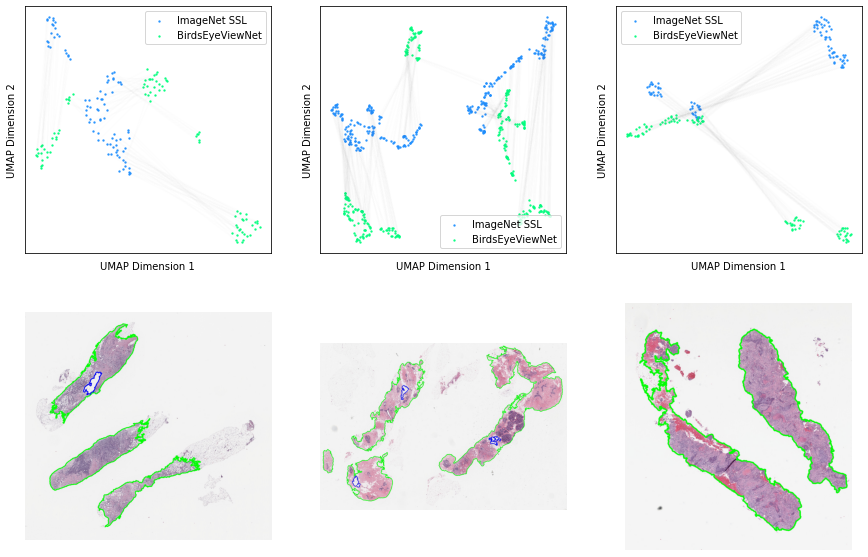

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

slide = "Her2Neg_Case_44.h5"
one_slide_umap(slide,axes[0,0],first=True)
show_WSI_image(slide,axes[1,0])

slide = "Her2Neg_Case_39.h5"
one_slide_umap(slide,axes[0,1])
show_WSI_image(slide,axes[1,1])

slide = "Her2Pos_Case_67.h5"
one_slide_umap(slide,axes[0,2])
show_WSI_image(slide,axes[1,2])

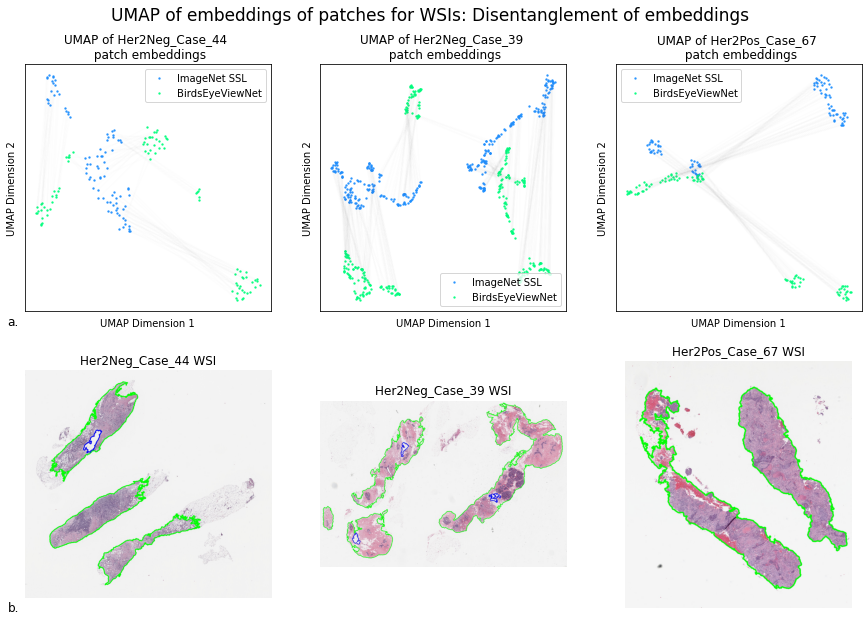

In [4]:

axes[0,0].set_title("UMAP of Her2Neg_Case_44 \n patch embeddings", fontsize=12)
axes[0,1].set_title("UMAP of Her2Neg_Case_39 \n patch embeddings", fontsize=12)
axes[0,2].set_title("UMAP of Her2Pos_Case_67 \n patch embeddings", fontsize=12)

axes[1,0].set_title("Her2Neg_Case_44 WSI", fontsize=12)
axes[1,1].set_title("Her2Neg_Case_39 WSI", fontsize=12)
axes[1,2].set_title("Her2Pos_Case_67 WSI", fontsize=12)

axes[0,0].text(-0.07, -0.07, 'a.', ha='left', va='bottom',fontsize=12, transform=axes[0,0].transAxes)
axes[1,0].text(-0.07, -0.07, 'b.', ha='left', va='bottom',fontsize=12, transform=axes[1,0].transAxes)

fig.suptitle("UMAP of embeddings of patches for WSIs: Disentanglement of embeddings", fontsize=17, y=0.96)
display(fig)
fig.savefig('../figures/UMAP_embeddings.png', dpi=300 ,bbox_inches='tight', pad_inches=.2, facecolor='white')